# Explore here

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import os
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

1. DATA COLLECTION

In [7]:
load_dotenv()
URL = os.getenv("DATA_URL")

if not URL:
    raise ValueError("No 'DATA_URL' found in file .env.")

df_raw = pd.read_csv(URL)
df_raw.to_csv("../data/raw/df_raw.csv", index=False)
print("File saved at '../data/raw/df_raw.csv'.")

File saved at '../data/raw/df_raw.csv'.


In [9]:
df = pd.read_csv("../data/raw/df_raw.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


2. EXPLORE & CLEAN DATA

In [ ]:
# 2.1. DIMENSIONS ➞ (rows, columns)
df.shape

(3140, 108)

In [12]:
# 2.2. DATA TYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [13]:
# 2.3. NA IDENTIFICATION AND DATA TYPES FOR EACH FEATURE
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [14]:
# 2.4. FIND & DROP DUPLICATES
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [15]:
# 2.5. HANDLE NA VALUES
df.isnull().sum().sort_values(ascending=False) / len(df)

fips                      0.0
TOT_POP                   0.0
0-9                       0.0
0-9 y/o % of total pop    0.0
19-Oct                    0.0
                         ... 
CKD_prevalence            0.0
CKD_Lower 95% CI          0.0
CKD_Upper 95% CI          0.0
CKD_number                0.0
Urban_rural_code          0.0
Length: 108, dtype: float64

3. UNIVARIATE VARIABLE ANALYSIS

3.1. DIVIDE DATASET INTO CATEGORICAL AND NUMERICAL

In [16]:
# 3.1.1. FEATURE TYPES
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [17]:
# 3.1.2. DIVIDE DF BY NUMERICAL AND CATEGORICAL
num = ['int64', 'float64']
cat = ['O']

df_num = df.select_dtypes(num)
df_cat = df.select_dtypes(cat)

3.2. CATEGORICAL VARIABLE ANALYSIS

In [18]:
df_cat.head()

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama


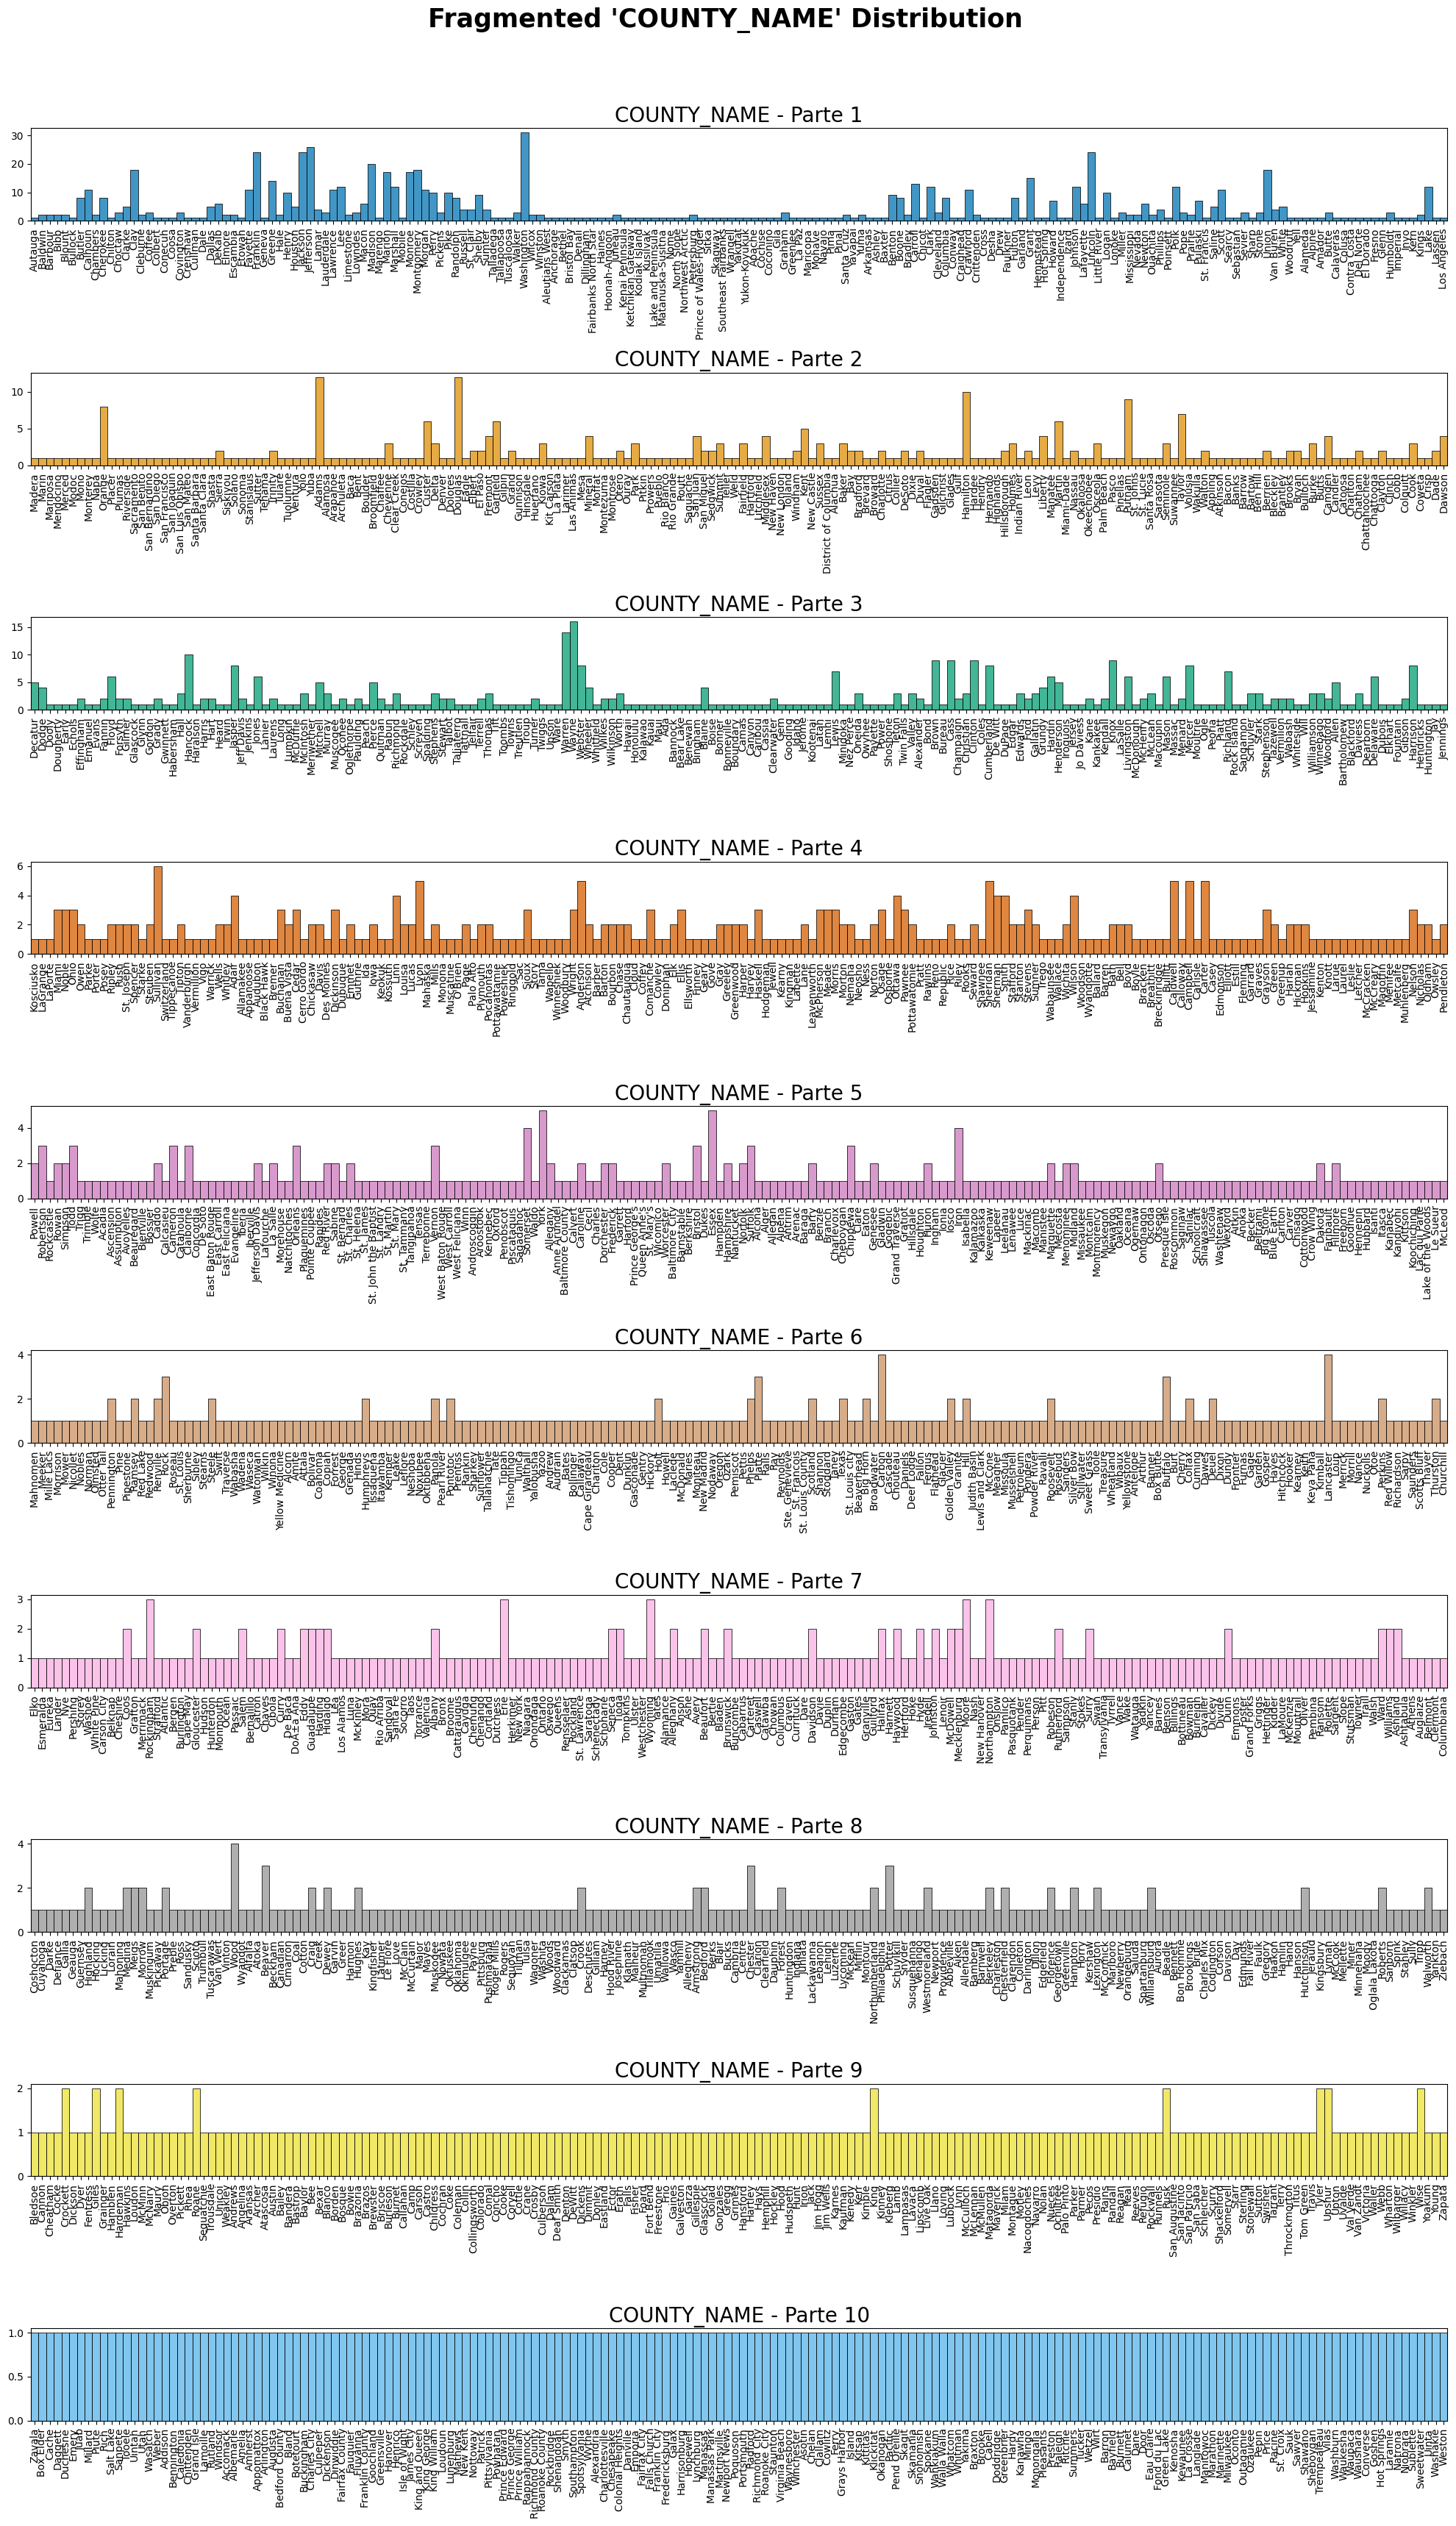

In [22]:
county_names = df_cat['COUNTY_NAME'].unique()
num_particiones = 10
divisiones = np.array_split(county_names, num_particiones)

fig, axis = plt.subplots(num_particiones, 1, figsize=(20, 35))
fig.suptitle("Fragmented 'COUNTY_NAME' Distribution", fontsize=25, fontweight='bold')

colores = sns.color_palette("colorblind", num_particiones)

for i, division in enumerate(divisiones):
    subset = df_cat[df_cat['COUNTY_NAME'].isin(division)]
    ax = axis[i]
    sns.histplot(data=subset, x="COUNTY_NAME", ax=ax, color=colores[i]).set(xlabel=None, ylabel=None)
    ax.set_title(f"COUNTY_NAME - Parte {i+1}", fontsize=20)
    ax.tick_params(axis='x', rotation=90)
    ax.margins(x=0)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()